In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Drop rows with any null values
df_train = df_train.dropna()

In [ ]:
df_train.Exited.value_counts(normalize=True)

0    0.788401
1    0.211599
Name: Exited, dtype: float64

In [ ]:
## useless columns
useless = ['Surname', 'CustomerId', 'id']
df_train.drop(useless, axis=1, inplace=True)

In [ ]:
df_train['Geography'].value_counts(normalize=True)

France     0.570882
Spain      0.219428
Germany    0.209690
Name: Geography, dtype: float64

In [ ]:
df_train.describe()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,56430.000000,56430.000000,56430.000000,56430.000000,56430.000000,56430.000000,56430.000000,56430.000000,56429.000000,56429.000000
mean,28214.500000,656.496952,38.062776,5.023906,55486.287878,1.554457,0.756105,0.496367,112657.073017,0.209697
std,16290.082182,80.308423,8.837285,2.811531,62773.363687,0.546742,0.429434,0.499991,50241.162020,0.407096
min,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,14107.250000,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74835.650000,0.000000
50%,28214.500000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,118045.980000,0.000000
75%,42321.750000,710.000000,42.000000,7.000000,119794.670000,2.000000,1.000000,1.000000,155700.150000,0.000000
max,56429.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
# Check churn for every column
obj_col=df_train.select_dtypes('O').columns
obj_col

Index(['Geography', 'Gender'], dtype='object')

Geography


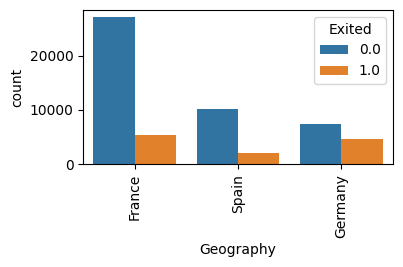

Gender


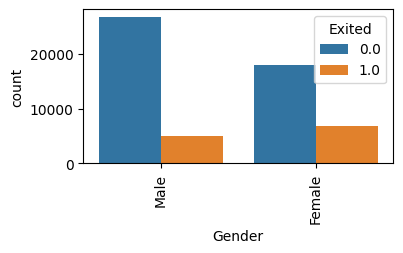

In [ ]:
for i in obj_col:
    print(i)

    plt.figure(figsize=(4,2))
    sns.countplot(x =i, data = df_train, hue= df_train['Exited'])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df_train.groupby(by=['Gender','Exited'])['Age'].count()

Gender  Exited
Female  0.0       17883
        1.0        6745
Male    0.0       26713
        1.0        5088
Name: Age, dtype: int64

In [ ]:
6745 / (6745 + 17883)

0.27387526392723727

In [ ]:
5088 / (5088+26713)

0.15999496871167573

In [ ]:
df_train.groupby(by=['Geography','Exited'])['Age'].count()

Geography  Exited
France     0.0       27091
           1.0        5263
Germany    0.0        7345
           1.0        4509
Spain      0.0       10160
           1.0        2061
Name: Age, dtype: int64

In [ ]:
# France
5263 / (5263 + 27091)

0.16266922173456141

In [ ]:
# Spain
2061 / (2061 + 10160)

0.16864413714098683

In [ ]:
# Germany
4509 / (4509 + 7345)

0.38037793149991567

In [ ]:
## Feature engineering

df_train['Gender']=df_train['Gender'].map({'Male':0,'Female':1})

# apply one-hot encoding to the 'category' column
one_hot_encoded = pd.get_dummies(df_train['Geography'])

# join the one-hot encoded columns to the original dataframe
df_train = df_train.join(one_hot_encoded)

# drop the original 'category' column
df_train = df_train.drop('Geography', axis=1)

In [ ]:
df_train.drop('Spain', axis=1, inplace=True)

In [ ]:
## Modelisation

In [ ]:
X = df_train.drop('Exited', axis=1)
y = df_train['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

In [ ]:
# Create XGBoost classifier
xgb_model = XGBClassifier()

# Define a grid of hyperparameters to search over
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [ ]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 1, 5],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [ ]:
best_params

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200}

In [ ]:
from sklearn.metrics import roc_auc_score

# Get the best hyperparameters and evaluate the model
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions and evaluate the model using AUC
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print("\nAUC:", auc)

Best Hyperparameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

AUC: 0.8913339544376989


In [ ]:
parameters = {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

## final model
xgb_model = XGBClassifier(**parameters)
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
## Test on train csv

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test = df_test.dropna()

## useless columns
useless = ['Surname', 'CustomerId']
df_test.drop(useless, axis=1, inplace=True)

## Feature engineering

df_test['Gender']=df_test['Gender'].map({'Male':0,'Female':1})

# apply one-hot encoding to the 'category' column
one_hot_encoded = pd.get_dummies(df_test['Geography'])

# join the one-hot encoded columns to the original dataframe
df_test = df_test.join(one_hot_encoded)

# drop the original 'category' column
df_test = df_test.drop('Geography', axis=1)

df_test.drop('Spain', axis=1, inplace=True)

In [ ]:
df_test

,id,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
0,165034,586,1,23.0,2,0.00,2,0.0,1.0,160976.75,1,0
1,165035,683,1,46.0,2,0.00,1,1.0,0.0,72549.27,1,0
2,165036,656,1,34.0,7,0.00,2,1.0,0.0,138882.09,1,0
3,165037,681,0,36.0,8,0.00,1,1.0,0.0,113931.57,1,0
4,165038,752,0,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,570,0,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0
110019,275053,575,1,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0
110020,275054,712,0,31.0,2,0.00,2,1.0,0.0,16287.38,1,0
110021,275055,709,1,32.0,3,0.00,1,1.0,1.0,158816.58,1,0


In [ ]:
df_test = df_test.drop('id', axis=1)

In [ ]:
df_test['Exited'] = xgb_model.predict_proba(df_test)[:, 1]

In [ ]:
df_final = df_test.copy()

In [ ]:
df_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Exited
0,586,1,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0.024214
1,683,1,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0.800552
2,656,1,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0.030222
3,681,0,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0.228449
4,752,0,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0.355396
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,0,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,0.038296
110019,575,1,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0.105543
110020,712,0,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0.020404
110021,709,1,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0.148904


In [ ]:
df_final['id'] = df_test['id']

In [ ]:
df_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Exited,id
0,586,1,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0.024214,165034
1,683,1,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0.800552,165035
2,656,1,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0.030222,165036
3,681,0,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0.228449,165037
4,752,0,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0.355396,165038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,0,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,0.038296,275052
110019,575,1,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0.105543,275053
110020,712,0,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0.020404,275054
110021,709,1,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0.148904,275055


In [ ]:
df_final[['id', 'Exited']].to_csv('sample_submission.csv', index=False)

In [ ]:
df = pd.read_csv('sample_submission.csv')

In [ ]:
df

,id,Exited
0,165034,0.024214
1,165035,0.800552
2,165036,0.030222
3,165037,0.228449
4,165038,0.355396
...,...,...
110018,275052,0.038296
110019,275053,0.105543
110020,275054,0.020404
110021,275055,0.148904


In [ ]:
## to do next, is to use weighted model